# 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_raw = pd.read_csv("Sensordata/CGM.csv", sep = ",")

In [4]:
data_raw.head()

,Index,Zeitstempel (JJJJ-MM-TTThh:mm:ss),Ereignisart,Ereignis-Unterart,Patienten-Info,Geräteinfo,Quellengerät-ID,Glukosewert (mmol/L),Insulinwert (E),Kohlenh.-Wert (Gramm),Dauer (hh:mm:ss),Glukose-Änderungsgeschwindigkeit (mmol/L/min),Transmitterzeit (Lange Ganzzahl),Transmitter-ID
0,1,NaN,Vorname,NaN,Salome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,Nachname,NaN,Blum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,Gerät,NaN,NaN,Dexcom G7 Mobile App,iOS G7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,Warnung,Fallen,NaN,NaN,iOS G7,NaN,NaN,NaN,NaN,0.2,NaN,NaN
4,5,NaN,Warnung,Hoch,NaN,NaN,iOS G7,14.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
len(data_raw)

2960

In [6]:
data_raw.columns

Index(['Index', 'Zeitstempel (JJJJ-MM-TTThh:mm:ss)', 'Ereignisart',
       'Ereignis-Unterart', 'Patienten-Info', 'Geräteinfo', 'Quellengerät-ID',
       'Glukosewert (mmol/L)', 'Insulinwert (E)', 'Kohlenh.-Wert (Gramm)',
       'Dauer (hh:mm:ss)', 'Glukose-Änderungsgeschwindigkeit (mmol/L/min)',
       'Transmitterzeit (Lange Ganzzahl)', 'Transmitter-ID'],
      dtype='object')

In [7]:
#Auswahl relevanter spalten

data_col = data_raw[["Zeitstempel (JJJJ-MM-TTThh:mm:ss)","Ereignisart","Ereignis-Unterart","Glukosewert (mmol/L)","Kohlenh.-Wert (Gramm)","Dauer (hh:mm:ss)"]].copy() 

In [8]:
data_col.head(15)

,Zeitstempel (JJJJ-MM-TTThh:mm:ss),Ereignisart,Ereignis-Unterart,Glukosewert (mmol/L),Kohlenh.-Wert (Gramm),Dauer (hh:mm:ss)
0,NaN,Vorname,NaN,NaN,NaN,NaN
1,NaN,Nachname,NaN,NaN,NaN,NaN
2,NaN,Gerät,NaN,NaN,NaN,NaN
3,NaN,Warnung,Fallen,NaN,NaN,NaN
4,NaN,Warnung,Hoch,14.0,NaN,NaN
5,NaN,Warnung,Niedrig,3.9,NaN,NaN
6,NaN,Warnung,Signalverlust,NaN,NaN,00:00:00
7,NaN,Warnung,Anstieg,NaN,NaN,NaN
8,NaN,Warnung,Niedriger Wert (dringend),3.1,NaN,NaN
9,NaN,Warnung,Bald niedriger Wert (dringend) – Bald,3.1,NaN,NaN


In [9]:
data_col.tail(20)

,Zeitstempel (JJJJ-MM-TTThh:mm:ss),Ereignisart,Ereignis-Unterart,Glukosewert (mmol/L),Kohlenh.-Wert (Gramm),Dauer (hh:mm:ss)
2940,2025-12-14T18:31:23,EGV,NaN,5.8,NaN,NaN
2941,2025-12-14T18:36:23,EGV,NaN,5.8,NaN,NaN
2942,2025-12-14T18:41:23,EGV,NaN,5.9,NaN,NaN
2943,2025-12-14T18:46:23,EGV,NaN,5.9,NaN,NaN
2944,2025-12-14T18:51:23,EGV,NaN,6.0,NaN,NaN
2945,2025-12-14T18:56:23,EGV,NaN,5.9,NaN,NaN
2946,2025-12-14T19:01:23,EGV,NaN,5.7,NaN,NaN
2947,2025-12-14T19:06:23,EGV,NaN,5.6,NaN,NaN
2948,2025-12-14T19:11:23,EGV,NaN,5.5,NaN,NaN
2949,2025-12-14T19:16:23,EGV,NaN,5.5,NaN,NaN


In [10]:
data_col = data_col.rename(columns = {"Zeitstempel (JJJJ-MM-TTThh:mm:ss)":"timestamp"})

In [11]:
data_col = data_col.rename(columns = {
    "Ereignisart" : "event",
    "Ereignis-Unterart" : "event2",
    "Glukosewert (mmol/L)" : "gluc_mmol_L",
    "Kohlenh.-Wert (Gramm)" : "kh_g"})

In [12]:
data_col.head()

,timestamp,event,event2,gluc_mmol_L,kh_g,Dauer (hh:mm:ss)
0,NaN,Vorname,NaN,NaN,NaN,NaN
1,NaN,Nachname,NaN,NaN,NaN,NaN
2,NaN,Gerät,NaN,NaN,NaN,NaN
3,NaN,Warnung,Fallen,NaN,NaN,NaN
4,NaN,Warnung,Hoch,14.0,NaN,NaN


In [13]:
data_col["timestamp"].isna().sum()

10

In [14]:
data_col["gluc_mmol_L"].isna().sum()

72

In [15]:
#Die ersten 10 Header-Zeilen mit allgemeinen Infos zu Nutzer und Gerät entfernen
data = data_col.dropna(subset = ["timestamp"]).copy()
data.head()

,timestamp,event,event2,gluc_mmol_L,kh_g,Dauer (hh:mm:ss)
10,2025-12-04T19:51:28,EGV,NaN,4.7,NaN,NaN
11,2025-12-04T19:56:27,EGV,NaN,5.2,NaN,NaN
12,2025-12-04T20:01:28,EGV,NaN,5.2,NaN,NaN
13,2025-12-04T20:06:28,EGV,NaN,4.8,NaN,NaN
14,2025-12-04T20:11:28,EGV,NaN,4.9,NaN,NaN


In [16]:
#Datumsformat konvertieren
data["timestamp"] = pd.to_datetime(data["timestamp"], errors = "raise")

In [17]:
data.head()

,timestamp,event,event2,gluc_mmol_L,kh_g,Dauer (hh:mm:ss)
10,2025-12-04 19:51:28,EGV,NaN,4.7,NaN,NaN
11,2025-12-04 19:56:27,EGV,NaN,5.2,NaN,NaN
12,2025-12-04 20:01:28,EGV,NaN,5.2,NaN,NaN
13,2025-12-04 20:06:28,EGV,NaN,4.8,NaN,NaN
14,2025-12-04 20:11:28,EGV,NaN,4.9,NaN,NaN


In [18]:
weekdays= "Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag", "Sonntag", 
days_count = [0,0,0,0,0,0,0]

dict = {}

current_day = data["timestamp"].iloc[0].date()
dict[weekdays[current_day.weekday()]+"_"+str(days_count[current_day.weekday()])] = []

for i, date in enumerate(data["timestamp"]):
    if date.date() != current_day: #Falls neues Datum
        current_day = date.date()
        days_count[date.dayofweek]+=1
        dict[weekdays[date.dayofweek]+"_"+str(days_count[date.dayofweek])] = [] #neuen Dictionary-key erstellen
        dict[weekdays[date.dayofweek]+"_"+str(days_count[date.dayofweek])].append(i) #Indize der Zeilen in data speichern

    else:
        dict[weekdays[date.dayofweek]+"_"+str(days_count[date.dayofweek])].append(i) #Indize der Zeilen in data speichern

In [19]:
for key in dict:
    print(key)

Donnerstag_0
Freitag_1
Samstag_1
Sonntag_1
Montag_1
Dienstag_1
Mittwoch_1
Donnerstag_1
Freitag_2
Samstag_2
Sonntag_2


In [20]:
list_test = dict.get("Mittwoch_1")[0]
list_test

1531

In [21]:
data["timestamp"].iloc[0::]

10     2025-12-04 19:51:28
11     2025-12-04 19:56:27
12     2025-12-04 20:01:28
13     2025-12-04 20:06:28
14     2025-12-04 20:11:28
               ...        
2955   2025-12-14 19:46:23
2956   2025-12-14 19:51:23
2957   2025-12-14 19:56:23
2958   2025-12-14 20:01:23
2959   2025-12-14 20:06:23
Name: timestamp, Length: 2950, dtype: datetime64[ns]

In [22]:
date = data["timestamp"].iloc[dict.get("Freitag_1")[0::]]
date

60    2025-12-05 00:01:31
61    2025-12-05 00:06:31
62    2025-12-05 00:11:31
63    2025-12-05 00:16:31
64    2025-12-05 00:21:31
              ...        
353   2025-12-05 23:36:26
354   2025-12-05 23:41:26
355   2025-12-05 23:46:26
356   2025-12-05 23:51:25
357   2025-12-05 23:56:26
Name: timestamp, Length: 298, dtype: datetime64[ns]

In [23]:
#Vergangene Zeit in Sekunden berechnen
data_s = data.copy()
delta = data["timestamp"]-data["timestamp"].dt.normalize()
delta = delta.dt.total_seconds()
data_s["delta_time_s"] = delta
data_s.head(60)
#delta.head(60)

,timestamp,event,event2,gluc_mmol_L,kh_g,Dauer (hh:mm:ss),delta_time_s
10,2025-12-04 19:51:28,EGV,NaN,4.7,NaN,NaN,71488.0
11,2025-12-04 19:56:27,EGV,NaN,5.2,NaN,NaN,71787.0
12,2025-12-04 20:01:28,EGV,NaN,5.2,NaN,NaN,72088.0
13,2025-12-04 20:06:28,EGV,NaN,4.8,NaN,NaN,72388.0
14,2025-12-04 20:11:28,EGV,NaN,4.9,NaN,NaN,72688.0
15,2025-12-04 20:16:28,EGV,NaN,5.3,NaN,NaN,72988.0
16,2025-12-04 20:21:27,EGV,NaN,5.8,NaN,NaN,73287.0
17,2025-12-04 20:26:28,EGV,NaN,5.4,NaN,NaN,73588.0
18,2025-12-04 20:31:28,EGV,NaN,5.2,NaN,NaN,73888.0
19,2025-12-04 20:36:27,EGV,NaN,5.2,NaN,NaN,74187.0


In [24]:
#Alle Werte über den gesamten Messzeitraum zwischen 00.00 und 06.00 Uhr nachts --> Ermitteln des basalen Glukose-Werts
time_00_06 = data_s[data_s["timestamp"].dt.hour.between(0, 5)] #Alle Daten zwischen 0 und 4 Uhr --> evtl. kleineren Zeitslot?
time_00_06

,timestamp,event,event2,gluc_mmol_L,kh_g,Dauer (hh:mm:ss),delta_time_s
60,2025-12-05 00:01:31,EGV,NaN,5.8,NaN,NaN,91.0
61,2025-12-05 00:06:31,EGV,NaN,5.8,NaN,NaN,391.0
62,2025-12-05 00:11:31,EGV,NaN,5.8,NaN,NaN,691.0
63,2025-12-05 00:16:31,EGV,NaN,5.5,NaN,NaN,991.0
64,2025-12-05 00:21:31,EGV,NaN,5.0,NaN,NaN,1291.0
...,...,...,...,...,...,...,...
2784,2025-12-14 05:36:17,EGV,NaN,5.7,NaN,NaN,20177.0
2785,2025-12-14 05:41:17,EGV,NaN,5.5,NaN,NaN,20477.0
2786,2025-12-14 05:46:17,EGV,NaN,5.3,NaN,NaN,20777.0
2787,2025-12-14 05:51:17,EGV,NaN,5.3,NaN,NaN,21077.0


In [25]:
#Durchschnittlicher Glukose-Wert zwischen 00.00 und 06.00 Uhr nachts
Gpl_b_mean = np.mean(time_00_06["gluc_mmol_L"])
Gpl_b_mean

5.2425

In [26]:
#Standardabweichung des Glukose-Werts zwischen 00.00 und 04.00 Uhr nachts
Gpl_b_std = np.std(time_00_06["gluc_mmol_L"])
Gpl_b_std

0.568965313334457

In [27]:
from statsmodels.nonparametric.smoothers_lowess import lowess as lw

In [28]:
#Alle Werte über den gesamten Messzeitraum zwischen 00.00 und 06.00 Uhr nachts --> Schätzwert für Messrauschen
time_00_06 = data_s[data_s["timestamp"].dt.hour.between(0, 3)] #Alle Daten zwischen 0 und 4 Uhr --> evtl. kleineren Zeitslot?
time_00_06

,timestamp,event,event2,gluc_mmol_L,kh_g,Dauer (hh:mm:ss),delta_time_s
60,2025-12-05 00:01:31,EGV,NaN,5.8,NaN,NaN,91.0
61,2025-12-05 00:06:31,EGV,NaN,5.8,NaN,NaN,391.0
62,2025-12-05 00:11:31,EGV,NaN,5.8,NaN,NaN,691.0
63,2025-12-05 00:16:31,EGV,NaN,5.5,NaN,NaN,991.0
64,2025-12-05 00:21:31,EGV,NaN,5.0,NaN,NaN,1291.0
...,...,...,...,...,...,...,...
2760,2025-12-14 03:36:17,EGV,NaN,5.3,NaN,NaN,12977.0
2761,2025-12-14 03:41:17,EGV,NaN,5.3,NaN,NaN,13277.0
2762,2025-12-14 03:46:17,EGV,NaN,5.3,NaN,NaN,13577.0
2763,2025-12-14 03:51:17,EGV,NaN,5.7,NaN,NaN,13877.0


In [29]:
weekdays_00_06 = time_00_06.groupby(time_00_06["timestamp"].dt.date)
len(weekdays_00_06), weekdays_00_06.groups.keys()

(10,
 dict_keys([datetime.date(2025, 12, 5), datetime.date(2025, 12, 6), datetime.date(2025, 12, 7), datetime.date(2025, 12, 8), datetime.date(2025, 12, 9), datetime.date(2025, 12, 10), datetime.date(2025, 12, 11), datetime.date(2025, 12, 12), datetime.date(2025, 12, 13), datetime.date(2025, 12, 14)]))

In [30]:
resid_per_night = {}
trend = 0
for date, night in weekdays_00_06:
    night = night.copy()
    trend = lw(endog = night["gluc_mmol_L"], exog = night["delta_time_s"], frac = 0.2, return_sorted = False)
    resid = night["gluc_mmol_L"].values-trend
    resid_per_night[date] = resid
trend

array([5.52522527, 5.52468036, 5.52948481, 5.54024856, 5.56383064,
       5.63560188, 5.70673222, 5.77857148, 5.82166028, 5.81175711,
       5.78711284, 5.75736592, 5.71351879, 5.67648811, 5.65498805,
       5.64708542, 5.67113415, 5.71305663, 5.74746895, 5.75452124,
       5.73150644, 5.67570722, 5.61105854, 5.55386284, 5.50222953,
       5.45541814, 5.45248479, 5.48407683, 5.49500728, 5.52399216,
       5.56195484, 5.56271365, 5.54839615, 5.53777059, 5.51627827,
       5.47511191, 5.42088655, 5.37036478, 5.34019312, 5.32089331,
       5.30719513, 5.30676595, 5.30989473, 5.3082935 , 5.34931984,
       5.39150332, 5.43422566, 5.48114663])

In [31]:
for keys in resid_per_night:
    print(keys)

2025-12-05
2025-12-06
2025-12-07
2025-12-08
2025-12-09
2025-12-10
2025-12-11
2025-12-12
2025-12-13
2025-12-14


In [32]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import datetime

In [33]:
resid_per_night[datetime.date(2025, 12, 5)]

array([-0.08028473,  0.05076715,  0.17678722, -0.0088086 , -0.39746435,
       -0.26829774,  0.14851015,  0.47581762,  0.17562581, -0.04790709,
       -0.32492025, -0.68999477,  0.02163228,  0.51544059,  0.19604692,
        0.0699024 , -0.44075897, -0.1462865 ,  0.35001446,  0.13132204,
       -0.05263816, -0.10381977, -0.10607483, -0.09570678, -0.18204705,
        0.07028966,  1.03434651,  0.66337412, -0.43219087, -0.1862503 ,
        0.07524191,  0.08426647,  0.01797779,  0.07868356, -0.16975647,
       -0.05458235, -0.03673363,  0.5887279 ,  0.01290551, -0.15037346,
       -0.01868538, -0.16809285, -0.04791875, -0.38852675,  0.39269105,
        0.18031581,  0.0660735 , -0.24067099])

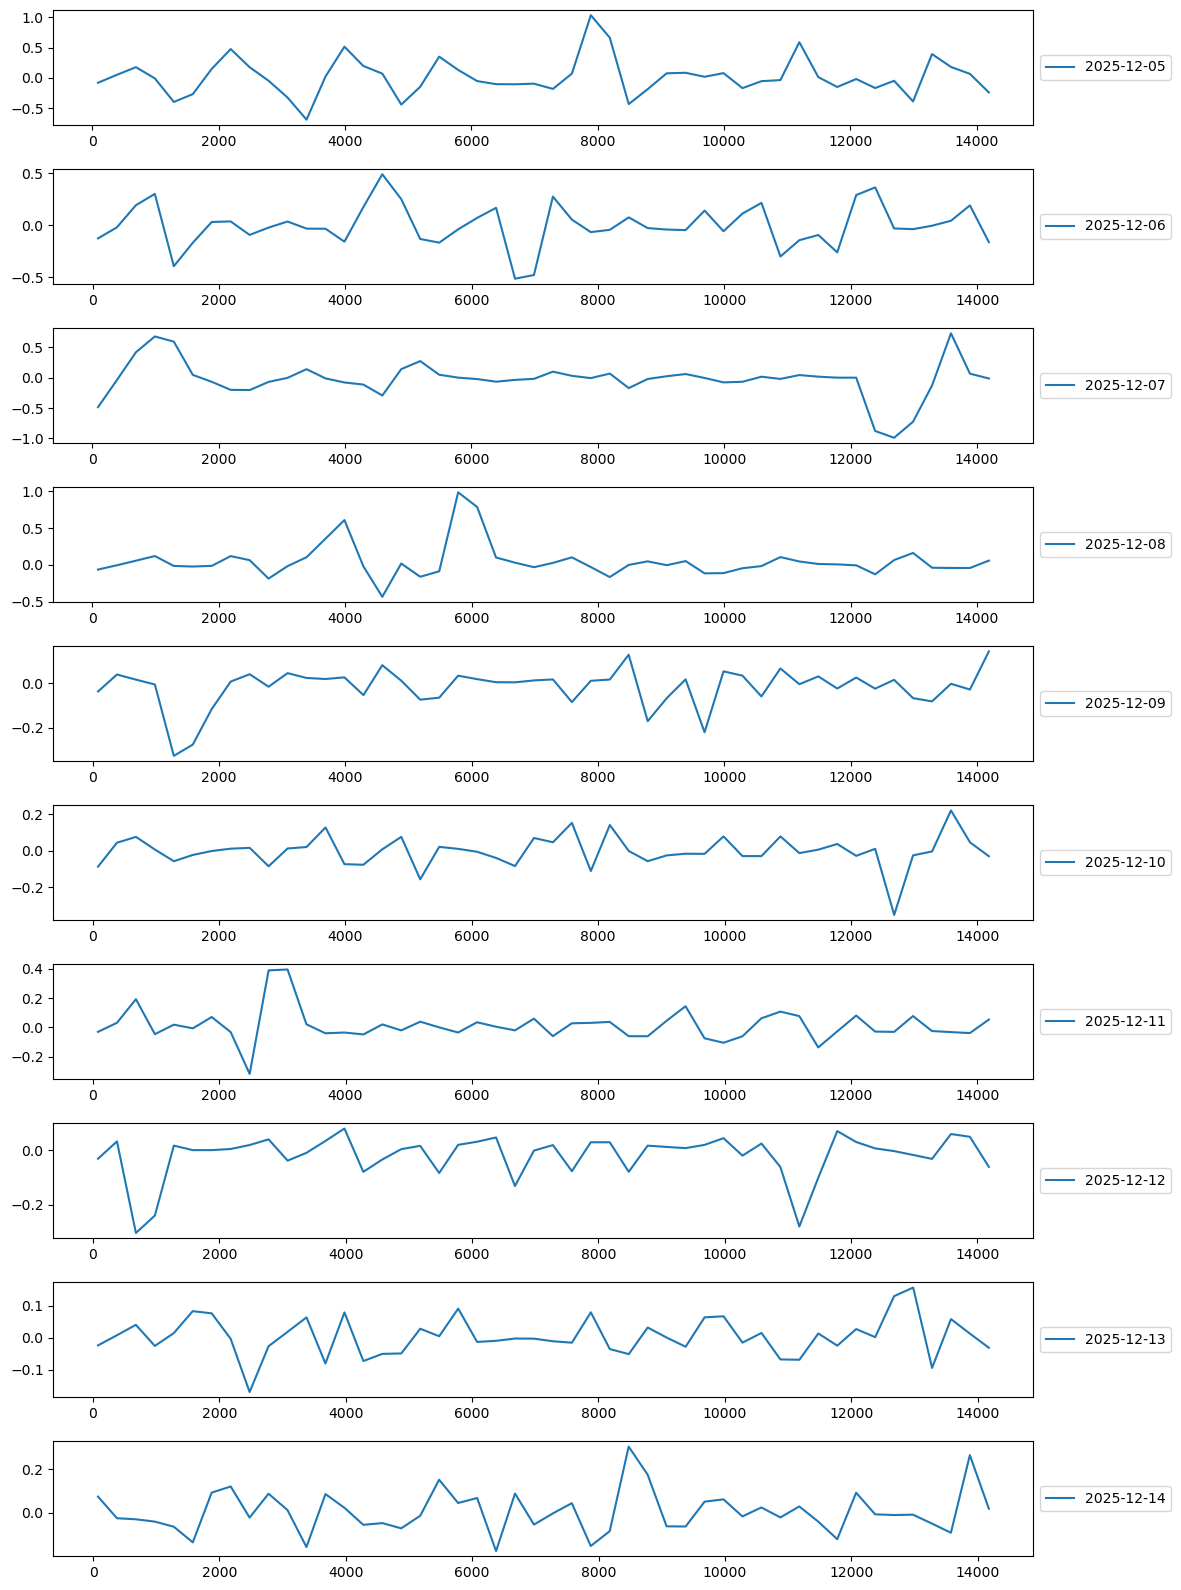

In [34]:
fig, ax = plt.subplots(len(resid_per_night), figsize=(12, 16))

for i, key in enumerate(resid_per_night):
    df_day = weekdays_00_06.get_group(key)
    ax[i].plot(df_day["delta_time_s"], resid_per_night[key], label = str(key))
    ax[i].legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()

In [35]:
resid_acf = {}
for i, keys in enumerate(resid_per_night):
    resid_acf[keys] = acf(resid_per_night[keys], alpha = .05)

In [36]:
"""for keys in resid_acf:
    print(resid_acf[keys][1])"""

'for keys in resid_acf:\n    print(resid_acf[keys][1])'

Von Auge ausgewertet - evtl. numerisch nochmal dahinter: Konfidenzintervalle nahe null, in vielen Fällen ist null im Konfidenzintervall enthalten.

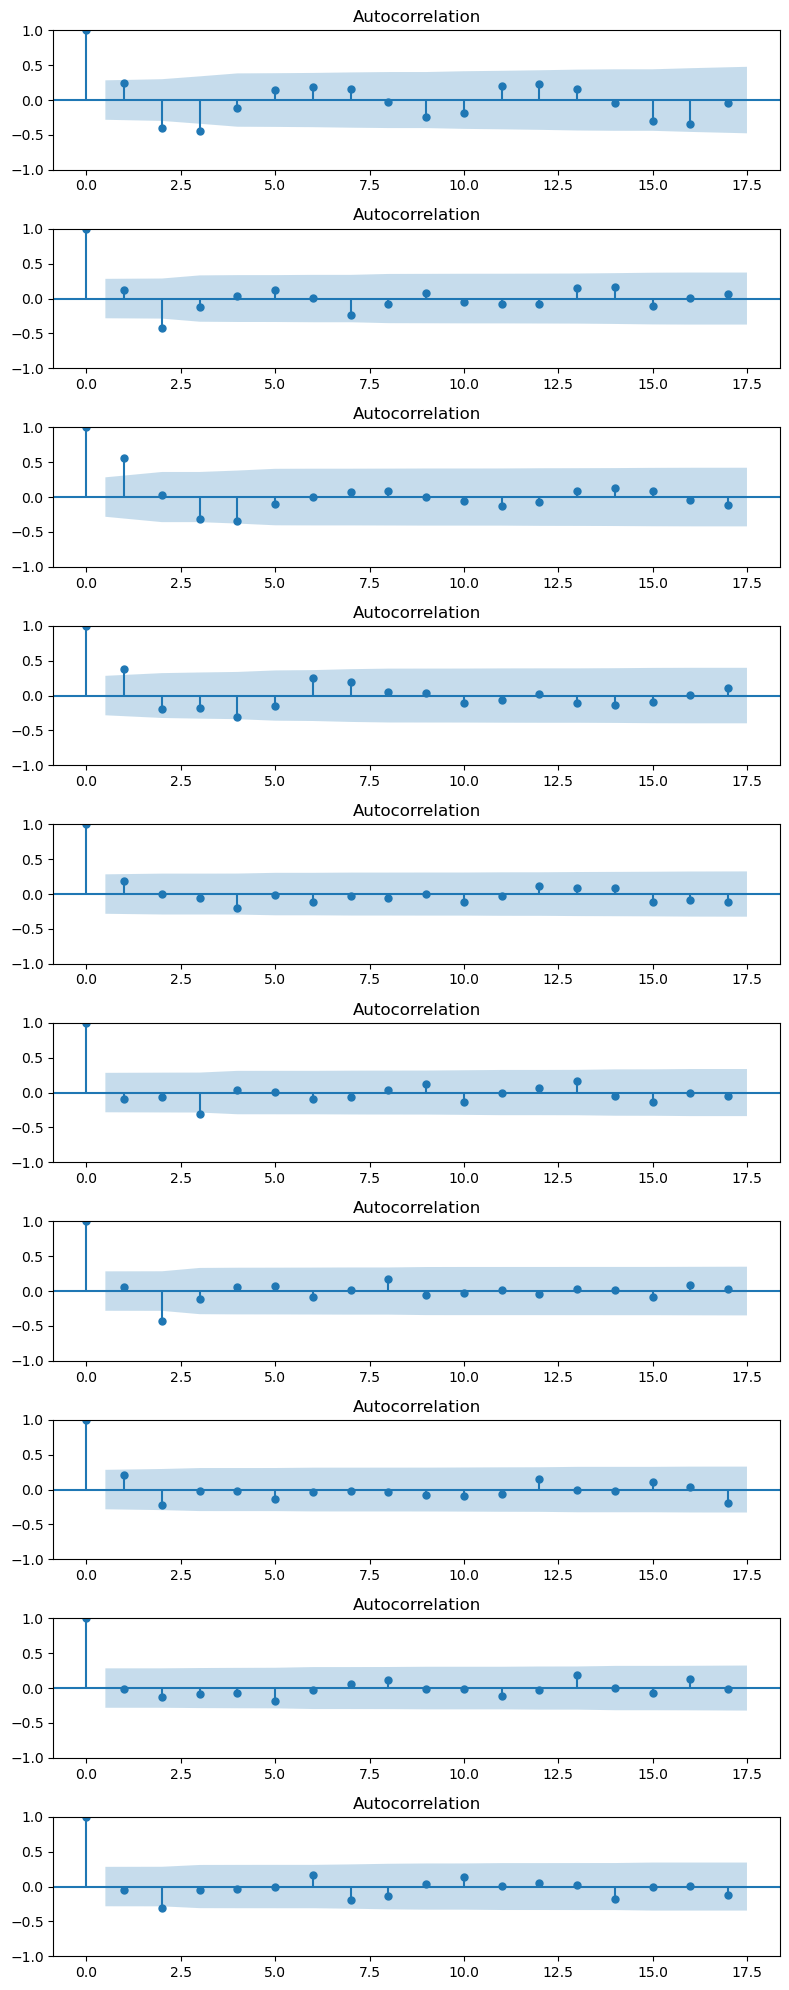

In [37]:
fig, ax = plt.subplots(len(resid_per_night), figsize = (8, 20))

for i, keys in enumerate(resid_per_night):
    plot_acf(resid_per_night[keys], ax = ax[i], alpha = .05)
    plt.tight_layout()

In [38]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

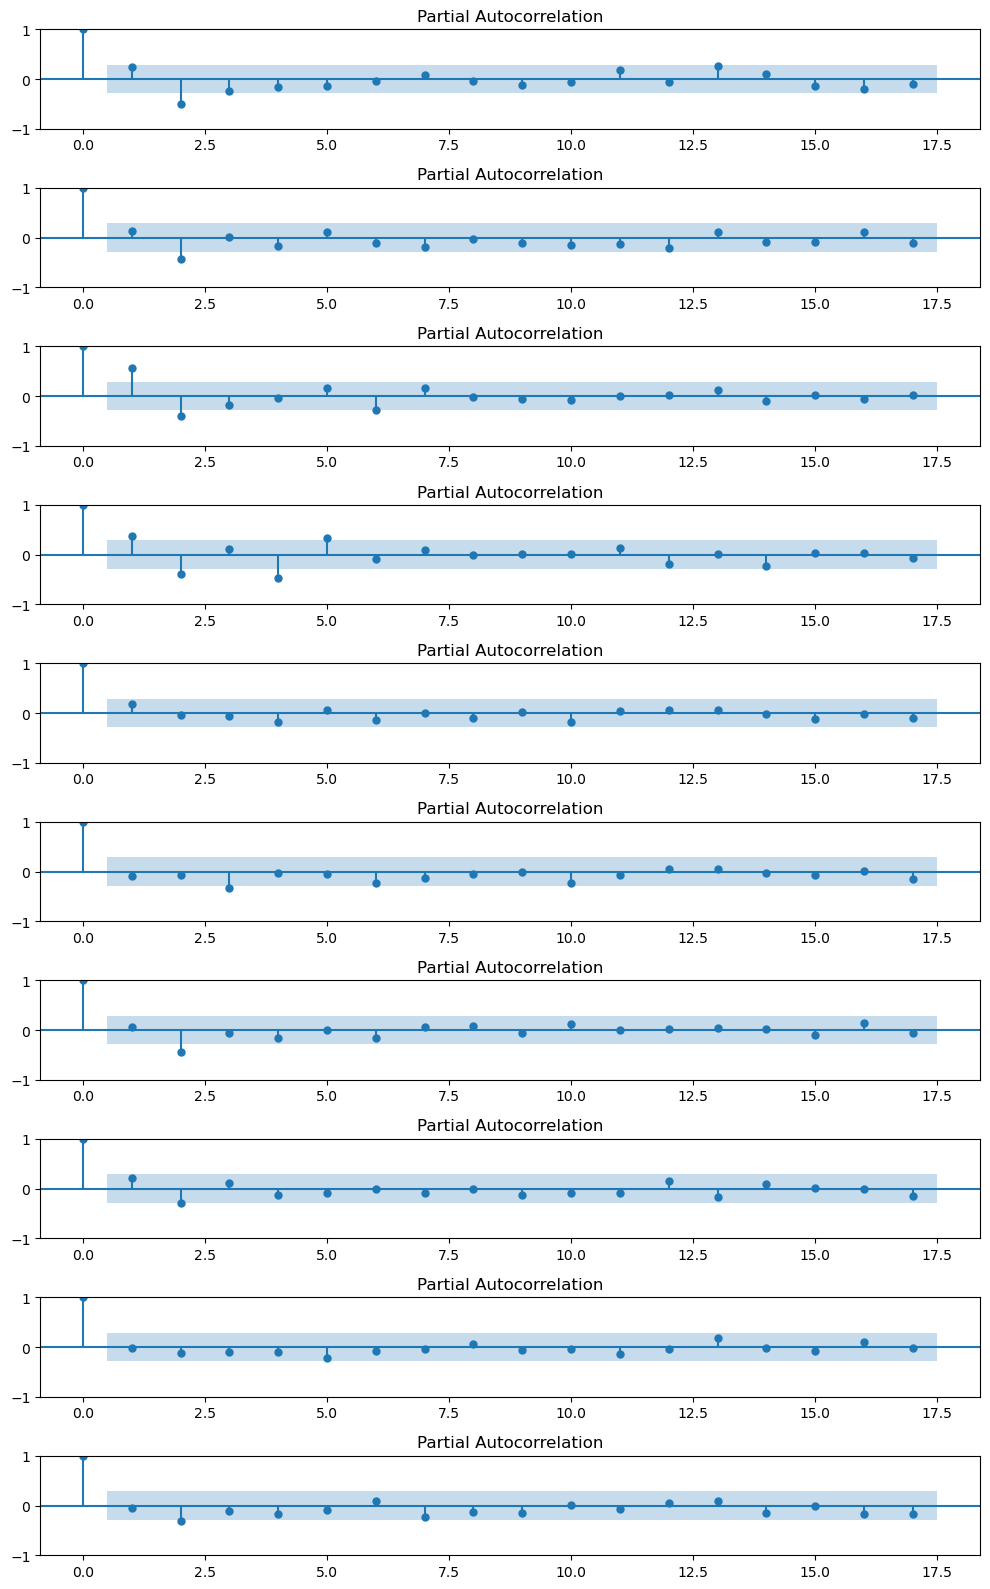

In [39]:
fig, ax = plt.subplots(len(resid_per_night), figsize = (10, 16))

for i, keys in enumerate(resid_per_night):
    plot_pacf(resid_per_night[keys], ax = ax[i], alpha = .05)
    plt.tight_layout()

Alle Lags mehrheitlich innerhalb des Konfidenzintervalls, Residuenplots scheinen um null zu streuen --> Annahme von Weissrauschen der Residuen scheint erfüllt.

In [40]:
std_per_night = {}
for keys in resid_per_night:
    std = np.std(resid_per_night[keys])
    std_per_night[keys] = std
    print(std)

0.30424931482432854
0.19993747684276067
0.30283454241052565
0.22534373432981594
0.08651729277940678
0.08615469253334997
0.11021454956138747
0.0800411792640535
0.059218321341790184
0.09743031620081849


Schätzer für Messrauschen aus Standardabweichung der Residuen berechnen

In [41]:
std_mean = 0
sum_std = 0
for keys in std_per_night:
    sum_std += std_per_night[keys]
    std_mean = sum_std/len(std_per_night)
print(std_mean)

0.15519414200882373


In [42]:
### Differenz zwischen Zeitschritten überprüfen

In [43]:
diff = []

for i, date in enumerate(data_s["delta_time_s"]):
    if i < (len(data_s)-1):
        new_time = data_s["delta_time_s"].iloc[i+1]
        if new_time < date:
            d = 24*3600-date
            delta = d+new_time
        
        else:
            delta = new_time-date
    
        diff.append(delta)

In [44]:
np.max(diff), np.min(diff), np.mean(diff)

(308.0, 0.0, 293.28416412343165)

In [45]:
abw_list = []

for d in diff:
    if d != 300:
        abw = 300-d
        abw_list.append(abw)

In [46]:
np.max(abw_list), np.min(abw_list)

(300.0, -8.0)

In [47]:
abw_list.append(0)
diff.append(0)
len(diff), len(data_s)

(2950, 2950)

In [48]:
diff_df = pd.DataFrame(diff, columns = ["Zeitdifferenz"])

In [49]:
len(diff), len(data_s)

(2950, 2950)

 Zeitdiff = 0 bei: Tag: Freitag_1, Zeit [s]: 69085.0, Zeile: 289
 NaN bei: Tag: Freitag_1, Zeit [s]: 27900.0, Zeile: 143, Zeitdiff: 87.0 
 NaN bei: Tag: Freitag_1, Zeit [s]: 31595.0, Zeile: 157, Zeitdiff: 292.0 
 NaN bei: Tag: Freitag_1, Zeit [s]: 44601.0, Zeile: 201, Zeitdiff: 185.0 
 NaN bei: Tag: Freitag_1, Zeit [s]: 47651.0, Zeile: 212, Zeitdiff: 135.0 
 NaN bei: Tag: Freitag_1, Zeit [s]: 50820.0, Zeile: 224, Zeitdiff: 266.0 
 NaN bei: Tag: Freitag_1, Zeit [s]: 52350.0, Zeile: 230, Zeitdiff: 161.0 
 NaN bei: Tag: Freitag_1, Zeit [s]: 52511.0, Zeile: 231, Zeitdiff: 76.0 
 NaN bei: Tag: Freitag_1, Zeit [s]: 52812.0, Zeile: 233, Zeitdiff: 75.0 
 NaN bei: Tag: Freitag_1, Zeit [s]: 68052.0, Zeile: 285, Zeitdiff: 136.0 
 NaN bei: Tag: Freitag_1, Zeit [s]: 69085.0, Zeile: 289, Zeitdiff: 0.0 
 NaN bei: Tag: Samstag_1, Zeit [s]: 31534.0, Zeile: 453, Zeitdiff: 51.0 
 NaN bei: Tag: Samstag_1, Zeit [s]: 31950.0, Zeile: 456, Zeitdiff: 235.0 
 NaN bei: Tag: Samstag_1, Zeit [s]: 32669.0, Zeile: 4

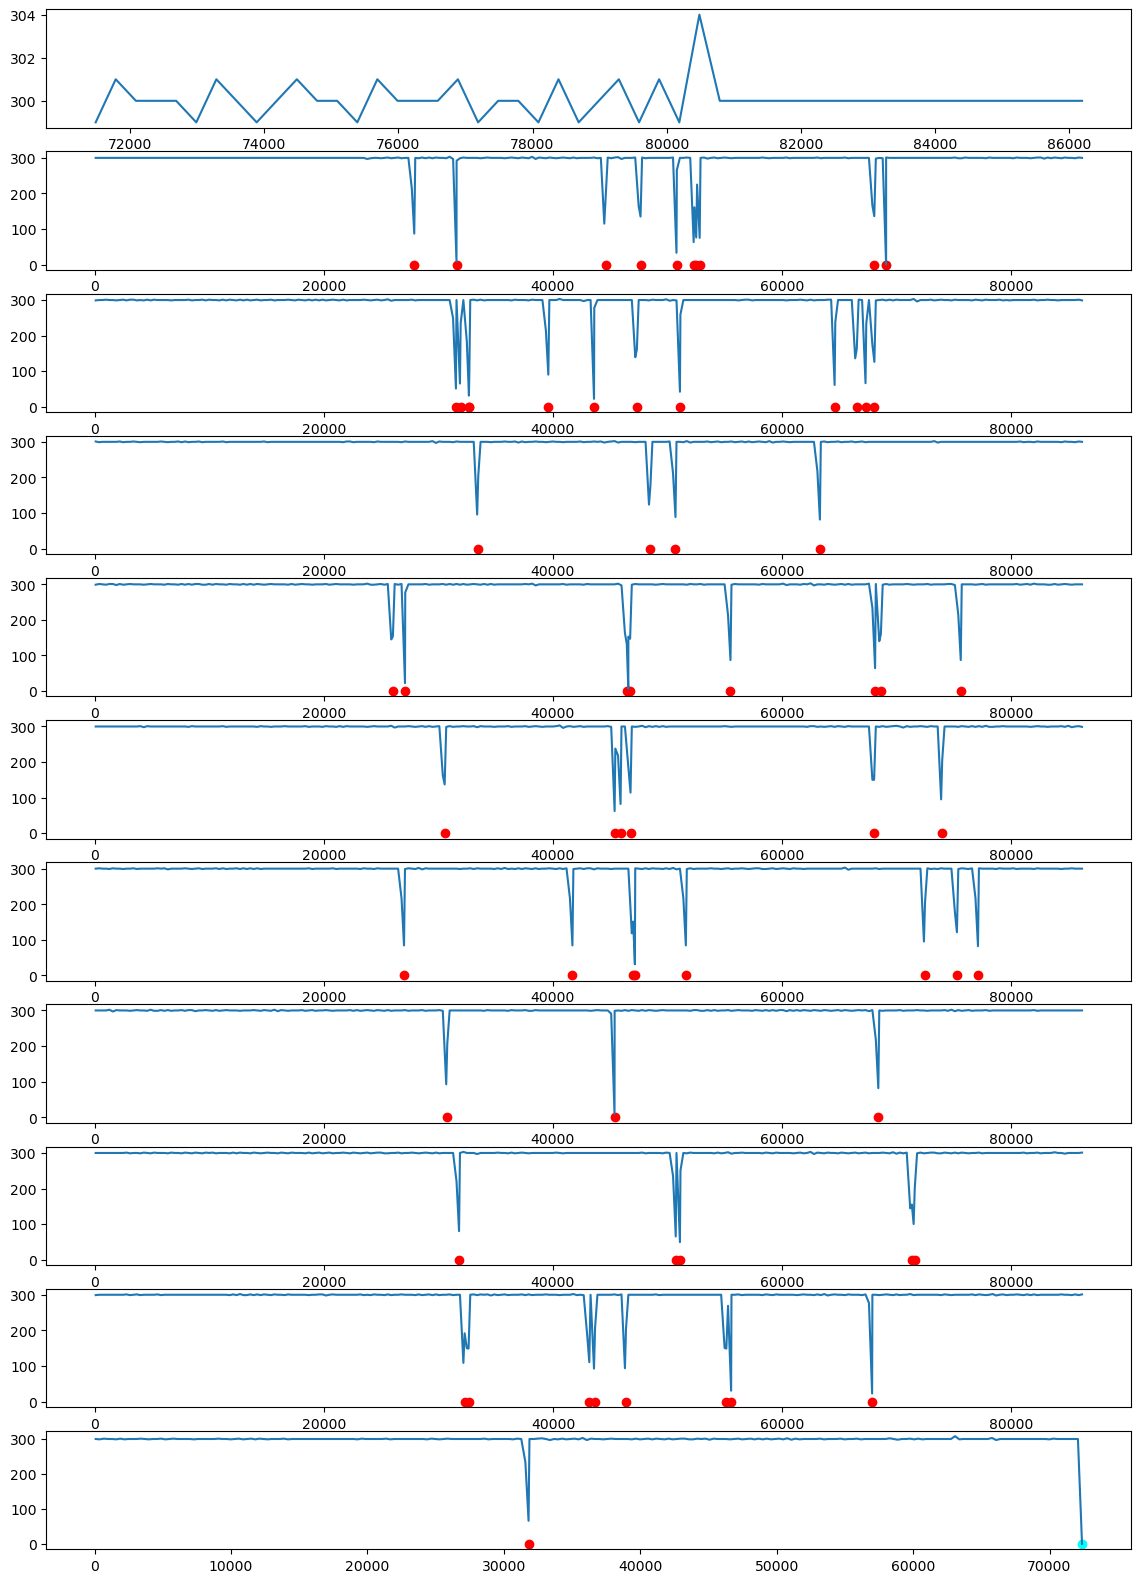

In [50]:
#Plot: Zeitpunkte, an denen die Zeitdifferenz null beträgt und Zeitpunkte, an denen ungültige Sensordaten gespeichert wurden
fig, ax = plt.subplots(len(dict), figsize = (14,20))

for i, tag in enumerate(dict):
    indices = dict.get(tag)
    zeit = data_s["delta_time_s"].iloc[indices]
    y = diff_df["Zeitdifferenz"].iloc[indices]
    ax[i].plot(zeit, y)
    for j, val in enumerate(y):
        if val == 0:
            ax[i].scatter(zeit.iloc[j], val, marker = "o", color = "cyan")
            print(f" Zeitdiff = 0 bei: Tag: {tag}, Zeit [s]: {zeit.iloc[j]}, Zeile: {indices[j]}")
    
    cgm = data_s["gluc_mmol_L"].iloc[indices]
    for k, c in enumerate(cgm):
        if np.isnan(c):
            ax[i].scatter(zeit.iloc[k], 0, marker = "o", color = "red")
            print(f" NaN bei: Tag: {tag}, Zeit [s]: {zeit.iloc[k]}, Zeile: {indices[k]}, Zeitdiff: {y.iloc[k]} ")
            
            

Der zweite Datenpunkt (Sonntag_2) ist der, den ich künstlich auf 0 gesetzt habe --> muss deshalb nicht evaluiert werden.

In [51]:
data_s["delta_time_s"].iloc[289], data_s["delta_time_s"].iloc[290]

(69085.0, 69085.0)

In [52]:
data_s["timestamp"].iloc[289], data_s["timestamp"].iloc[290]

(Timestamp('2025-12-05 19:11:25'), Timestamp('2025-12-05 19:11:25'))

In [53]:
data_s["gluc_mmol_L"].iloc[289], data_s["gluc_mmol_L"].iloc[290]

(nan, 5.9)

In [54]:
data_s["gluc_mmol_L"].isna().sum()

66

In [55]:
data_no_na = data_s.copy()
data_no_na = data_no_na.dropna(subset = "gluc_mmol_L")
data_no_na.head()

,timestamp,event,event2,gluc_mmol_L,kh_g,Dauer (hh:mm:ss),delta_time_s
10,2025-12-04 19:51:28,EGV,NaN,4.7,NaN,NaN,71488.0
11,2025-12-04 19:56:27,EGV,NaN,5.2,NaN,NaN,71787.0
12,2025-12-04 20:01:28,EGV,NaN,5.2,NaN,NaN,72088.0
13,2025-12-04 20:06:28,EGV,NaN,4.8,NaN,NaN,72388.0
14,2025-12-04 20:11:28,EGV,NaN,4.9,NaN,NaN,72688.0


In [56]:
data_no_na["gluc_mmol_L"].isna().sum()

0

In [57]:
diff_2 = []

for i, date in enumerate(data_no_na["delta_time_s"]):
    if i < (len(data_no_na)-1):
        new_time = data_no_na["delta_time_s"].iloc[i+1]
        if new_time < date:
            d = 24*3600-date
            delta = d+new_time
        
        else:
            delta = new_time-date
    
        diff_2.append(delta)

In [58]:
np.min(diff_2), np.max(diff_2), np.mean(diff_2), np.mean(diff)

(296.0, 308.0, 299.9982656954561, 293.1847457627119)

In [59]:
diff_2.append(0)

In [60]:
diff_2_df = pd.DataFrame(diff_2, columns = ["Zeitdifferenz"])

In [61]:
weekdays= "Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag", "Sonntag", 
days_count = [0,0,0,0,0,0,0]

dict_no_na = {}

current_day = data_no_na["timestamp"].iloc[0].date()
dict_no_na[weekdays[current_day.weekday()]+"_"+str(days_count[current_day.weekday()])] = []

for i, date in enumerate(data_no_na["timestamp"]):
    if date.date() != current_day: #Falls neues Datum
        current_day = date.date()
        days_count[date.dayofweek]+=1
        dict_no_na[weekdays[date.dayofweek]+"_"+str(days_count[date.dayofweek])] = [] #neuen Dictionary-key erstellen
        dict_no_na[weekdays[date.dayofweek]+"_"+str(days_count[date.dayofweek])].append(i) #Indize der Zeilen in data speichern

    else:
        dict_no_na[weekdays[date.dayofweek]+"_"+str(days_count[date.dayofweek])].append(i) #Indize der Zeilen in data speichern

 Zeitdiff = 0 bei: Tag: Sonntag_2, Zeit [s]: 72383.0, Zeile: 2883


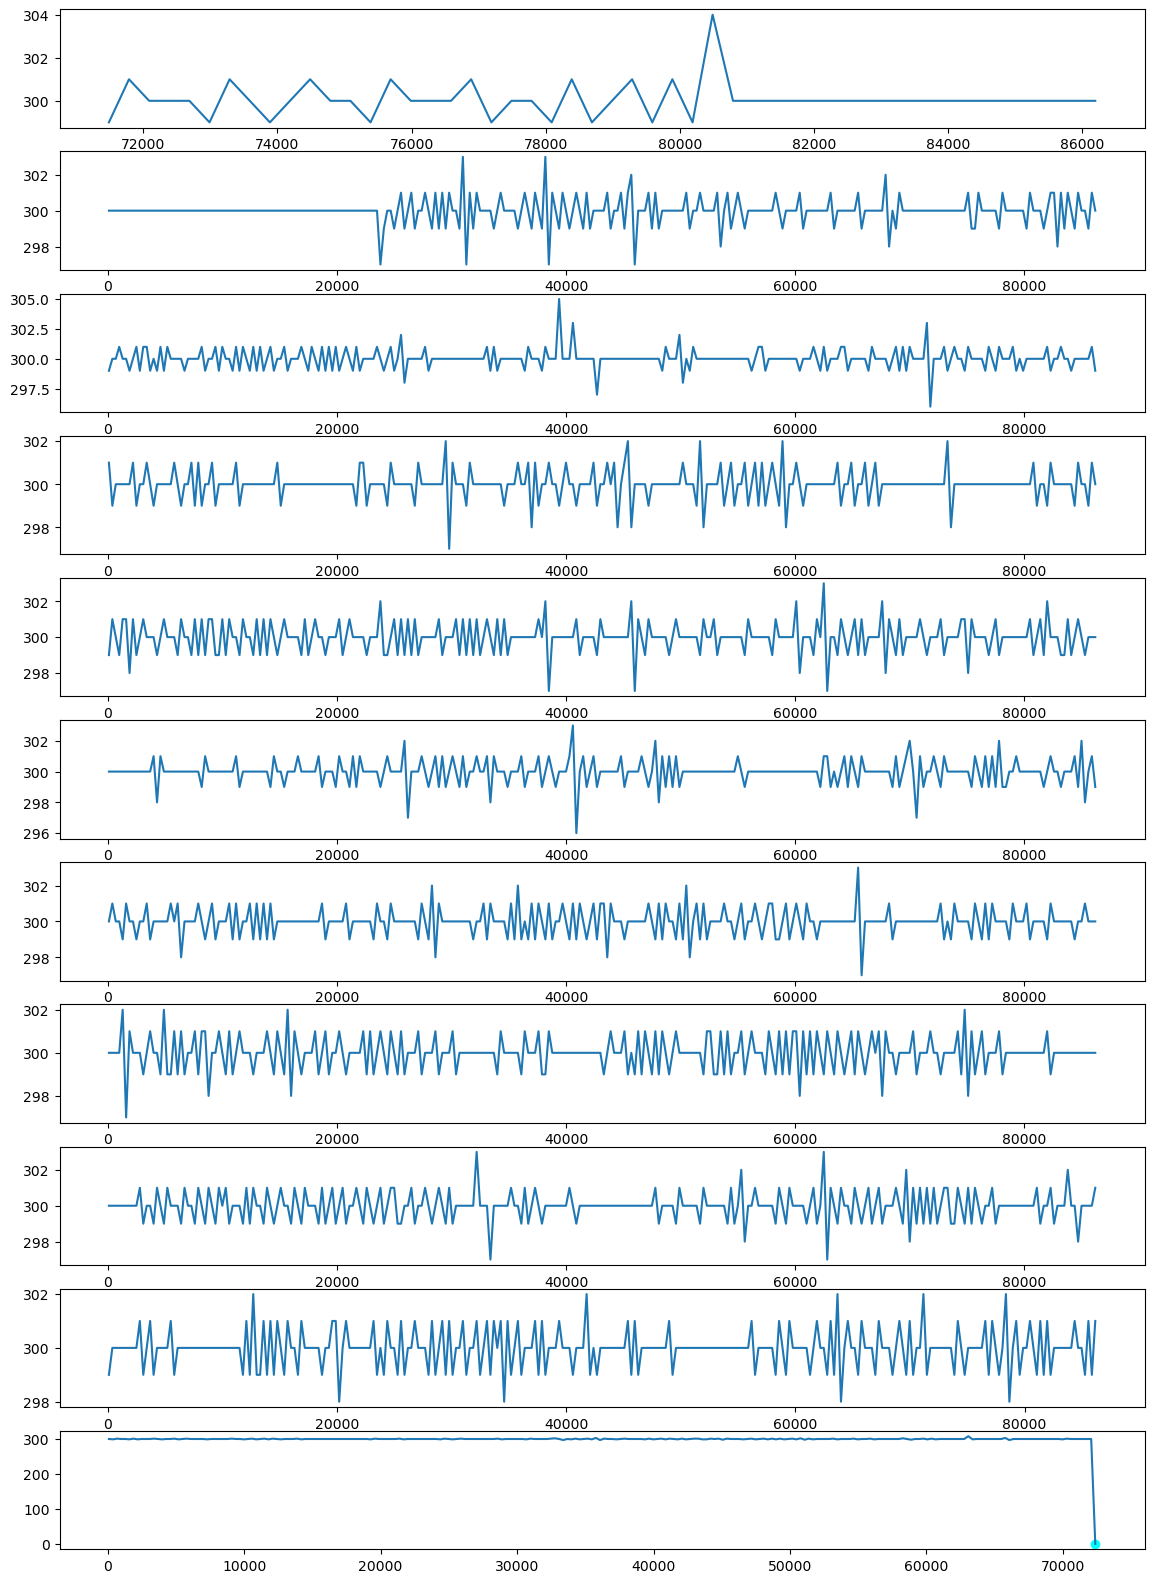

In [62]:
#Plot: Zeitpunkte, an denen die Zeitdifferenz null beträgt und Zeitpunkte, an denen ungültige Sensordaten gespeichert wurden
fig, ax = plt.subplots(len(dict), figsize = (14,20))

for i, tag in enumerate(dict_no_na):
    indices = dict_no_na.get(tag)
    zeit = data_no_na["delta_time_s"].iloc[indices]
    y = diff_2_df["Zeitdifferenz"].iloc[indices]
    ax[i].plot(zeit, y)
    for j, val in enumerate(y):
        if val == 0:
            ax[i].scatter(zeit.iloc[j], val, marker = "o", color = "cyan")
            print(f" Zeitdiff = 0 bei: Tag: {tag}, Zeit [s]: {zeit.iloc[j]}, Zeile: {indices[j]}")
    
    cgm = data_no_na["gluc_mmol_L"].iloc[indices]
    for k, c in enumerate(cgm):
        if np.isnan(c):
            ax[i].scatter(zeit.iloc[k], 0, marker = "o", color = "red")
            print(f" NaN bei: Tag: {tag}, Zeit [s]: {zeit.iloc[k]}, Zeile: {indices[k]}, Zeitdiff: {y.iloc[k]} ")

In [63]:
#überprüfen ob es Nachkommastellen ungleich 0 gibt:
frac = diff_2_df["Zeitdifferenz"]%1

In [64]:
for f in frac:
    if f > 0:
        print(f)

In [65]:
print(frac)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2879    0.0
2880    0.0
2881    0.0
2882    0.0
2883    0.0
Name: Zeitdifferenz, Length: 2884, dtype: float64


Sieht gut aus: Die Zeiten scheinen in ganzzahligen Sekunden zu sein.

In [66]:
# Grössenordnung der Abweichungen einschätzen
diff_norm = np.absolute(diff_2_df["Zeitdifferenz"]-300)
diff_norm = diff_norm.iloc[:-1]

In [67]:
np.mean(diff_norm), np.max(diff_norm), np.min(diff_norm)

(0.4471037114117239, 8.0, 0.0)

Die maximale Abweichung beträgt 8 Sekunden --> Dann könnte man im UKF eigentlich näherungsweise alle Zeitschritte in 300 Sekunden Abständen angeben, damit Update ein Vielfaches von Predict sein kann. Oder man testet, wie rechnungsschwer Predict wird, wenn es 1x / Sekunde ausgeführt wird. 

In [68]:
#Plot der Verteilung der Zeitdifferenzen zwischen einzelnen sensordaten
diff_2_cl = diff_2_df.iloc[:-1] #den künstlich hinzugefügten Nullwert wieder entfernen
count_diff = diff_2_cl.value_counts().sort_index()
count_diff

Zeitdifferenz
296.0               2
297.0              18
298.0              38
299.0             509
300.0            1748
301.0             516
302.0              38
303.0              11
304.0               1
305.0               1
308.0               1
Name: count, dtype: int64

In [69]:
x = count_diff.index.get_level_values(0)

In [70]:
y= count_diff.values

<BarContainer object of 11 artists>

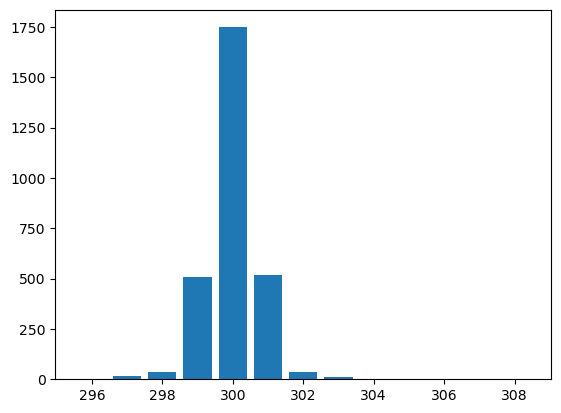

In [71]:
plt.bar(x, y)

In [72]:
data_no_na.head()

,timestamp,event,event2,gluc_mmol_L,kh_g,Dauer (hh:mm:ss),delta_time_s
10,2025-12-04 19:51:28,EGV,NaN,4.7,NaN,NaN,71488.0
11,2025-12-04 19:56:27,EGV,NaN,5.2,NaN,NaN,71787.0
12,2025-12-04 20:01:28,EGV,NaN,5.2,NaN,NaN,72088.0
13,2025-12-04 20:06:28,EGV,NaN,4.8,NaN,NaN,72388.0
14,2025-12-04 20:11:28,EGV,NaN,4.9,NaN,NaN,72688.0


In [73]:
data_no_na["timestamp"].dtype

dtype('<M8[ns]')

In [98]:
diff_2_cl.head()

,Zeitdifferenz
0,299.0
1,301.0
2,300.0
3,300.0
4,300.0


In [96]:
mean_abweichung = np.mean(diff_2_cl["Zeitdifferenz"])
mean_abweichung

299.9982656954561

In [100]:
np.std(diff_2_cl["Zeitdifferenz"])

0.7739675585211256

In [76]:
tagesstart = [] #Sammelt die ersten Messungen jedes Tages

keys = list(dict_no_na.keys()) #alle Schlüsselwörter des Dictionaries
drift = np.full((290,len(keys)-1), np.nan) #Zeilen: Drift des Messzeitpunkts im Verhältnis zum Raster, Spalten: Wochentage

for k, key in enumerate(keys[1:]): #Donnerstag auslassen, weil unvollständig
    values = dict_no_na.get(key)
    messung1 = data_no_na["delta_time_s"].iloc[values[0]]
    #print(key), print(data_no_na["delta_time_s"].iloc[values[0]])
    tagesstart.append(messung1)
    
    for i, v in enumerate(values[1:]):
        raster_zeit = messung1 + 300*(i+1)
        d = data_no_na["delta_time_s"].iloc[v]-raster_zeit
        drift[i,k] = d #Abspeichern der Drifts pro Tag. ACHTUNG: Zeilen entsprechen nicht demselben Zeitpunkt, weil jeder Tag zu einem anderen Zeitpunkt startet
        

In [77]:
tagesstart

[91.0, 86.0, 89.0, 88.0, 86.0, 84.0, 83.0, 81.0, 80.0, 78.0]

In [86]:
drift_end = [] #sammelt die Endverschiebung/ Tag im Verhältnis zu einem Gitterraster von Messungen alle 300s [s]
drift_max = [] #sammelt die maximale Verschiebung/ Tag [s]
drift_min = [] #sammelt die minimale Verschiebung/ Tag [s]
drift_mean = [] #sammelt die durchschnittliche Verschiebung/ Tag [s]

for d in drift.T: #Iterieren über die Spalten von drift
    end = d[~np.isnan(d)][-1]
    max = np.nanmax(d)
    min = np.nanmin(d)
    mean = np.nanmean(np.absolute(d))
    drift_end.append(end)
    drift_max.append(max)
    drift_min.append(min)
    drift_mean.append(mean)

In [87]:
drift[286]

array([-5.,  4., -1., -2., -1., -1., -2., -2., -3., nan])

In [88]:
drift_end

[-5.0, 4.0, -1.0, -2.0, -1.0, -1.0, -2.0, -2.0, -3.0, 5.0]

In [89]:
drift_max

[0.0, 7.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 0.0, 8.0]

In [90]:
drift_min

[-6.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -3.0, -2.0]

In [91]:
drift_mean

[3.4146341463414633,
 2.445993031358885,
 0.5505226480836237,
 0.9581881533101045,
 0.7526132404181185,
 0.5888501742160279,
 1.1184668989547037,
 0.9616724738675958,
 1.759581881533101,
 1.6721991701244814]

In [ ]:
data_no_na.to_csv("Sensordata/clean_data.csv", sep = ",", index = False)

In [93]:
np.mean(drift_mean)

1.4222721818208104